In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#Функция кросс-валидации
def cross_validation(train, features, target='TARGET', model=LogisticRegression(random_state=0)):
    
    auc_list = []

    kf = KFold(n_splits=5, shuffle = True)
    for i, (train_index, val_index) in enumerate(kf.split(train)):
        train_part = train.loc[train_index, : ]
        val_part = train.loc[val_index,:  ]

        model.fit( X=train_part[features], y = train_part[target] )
        val_prediction = model.predict_proba( val_part[features] )

        auc_val = roc_auc_score(val_part[target], val_prediction[:, 1])

        auc_list.append(auc_val)
        print( f'Fold {i}: AUC: {auc_val}')

    print( f'AV_AUC = {np.mean(auc_list)} '  )
    
    return np.mean(auc_list)

#Функция для создания csv файла для сабмишшна
def prepare_submission(submission_name, train, test, features, target='TARGET', model=LogisticRegression(random_state=0)):
    test_prediction = model.fit(train[features], train[target]).predict_proba(test[features])
    sample_submission = pd.read_csv('sample_submission.csv')
    sample_submission['TARGET']= test_prediction[:, 1]
    sample_submission.to_csv(submission_name, index = False)

In [3]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

In [4]:
train.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
#Из всех доступны признаков выберу те, c которыми буду работать в рамках данного задания
#['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [6]:
features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
train = train[['TARGET']+features]
test = test[features]

In [ ]:
#Модель 1
#Логистическая модель с фичами ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

In [7]:
print(train['NAME_CONTRACT_TYPE'].value_counts())
print(train['CODE_GENDER'].value_counts())
print(train['FLAG_OWN_CAR'].value_counts())
print(train['FLAG_OWN_REALTY'].value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


In [8]:
train['NAME_CONTRACT_TYPE'] = train['NAME_CONTRACT_TYPE'].replace( { 'Cash loans':1,'Revolving loans':0 })
test['NAME_CONTRACT_TYPE'] = test['NAME_CONTRACT_TYPE'].replace( { 'Cash loans':1,'Revolving loans':0 } )

train['CODE_GENDER'] = train['CODE_GENDER'].replace( { 'F':1,'M':0, 'XNA':-1 } )
test['CODE_GENDER'] = test['CODE_GENDER'].replace( { 'F':1,'M':0, 'XNA':-1 } )

train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace( { 'N':1,'Y':0 } )
test['FLAG_OWN_CAR'] = test['FLAG_OWN_CAR'].replace( { 'N':1,'Y':0 } )

train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace( { 'Y':1,'N':0 } )
test['FLAG_OWN_REALTY'] = test['FLAG_OWN_REALTY'].replace( { 'Y':1,'N':0 } )

In [9]:
features=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
cross_validation(train=train, features=features)

Fold 0: AUC: 0.572105233612949
Fold 1: AUC: 0.5666293989537506
Fold 2: AUC: 0.5761903727184945
Fold 3: AUC: 0.5763621883363609
Fold 4: AUC: 0.5770950283540615
AV_AUC = 0.5736764443951232 


0.5736764443951232

In [10]:
prepare_submission(submission_name='predict1.csv', train=train, test=test, features=features)
#score on kaggle predict1.csv: 0.57732

In [11]:
#Модель 2.
#Добавлю фичи 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'

In [12]:
#Смотрю кол-во пропусков
print(train[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].isna().sum())
print(test[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].isna().sum())

AMT_INCOME_TOTAL     0
AMT_CREDIT           0
AMT_ANNUITY         12
dtype: int64
AMT_INCOME_TOTAL     0
AMT_CREDIT           0
AMT_ANNUITY         24
dtype: int64


In [13]:
train['AMT_ANNUITY'] = train['AMT_ANNUITY'].mean()
test['AMT_ANNUITY'] = test['AMT_ANNUITY'].mean()

In [14]:
features=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
cross_validation(train=train, features=features)

Fold 0: AUC: 0.5203002854012232
Fold 1: AUC: 0.519775159841079
Fold 2: AUC: 0.5217631662607312
Fold 3: AUC: 0.5161492633282301
Fold 4: AUC: 0.5183710543042385
AV_AUC = 0.5192717858271004 


0.5192717858271004

In [15]:
prepare_submission(submission_name='predict2.csv', train=train, test=test, features=features)
#score on kaggle predict2.csv: 0.51007
#c введением трёх новых фичей модель стала хуже предсказывать

In [16]:
#Модель 3
#Стандартизирую три новые фичи из модели 2

In [17]:
features = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
StandScaler = StandardScaler()

StandScaler.fit(train[features])
train[features] = StandScaler.transform(train[features])
test[features] = StandScaler.transform(test[features])

In [18]:
features=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
cross_validation(train=train, features=features)

Fold 0: AUC: 0.5822850314365996
Fold 1: AUC: 0.5876041030334093
Fold 2: AUC: 0.5787175820747193
Fold 3: AUC: 0.5817881552938293
Fold 4: AUC: 0.5854623743017616
AV_AUC = 0.5831714492280639 


0.5831714492280639

In [19]:
prepare_submission(submission_name='predict3.csv', train=train, test=test, features=features)
#score on kaggle predict3.csv: 0.5
#Стандартизация фичей ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'] показала значительно
#улучшение результата на кросс-валидации по сравнению с моделью 2, однако при предсказании на тестовой выборке
#результат стал ещё хуже

In [20]:
#Модель 4
#В модели 4 убираю фичи, добавленные в модели 3 и добавляю фичи ['NAME_TYPE_SUITE','NAME_INCOME_TYPE']

In [22]:
#['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
print(train['NAME_TYPE_SUITE'].value_counts())
print(train['NAME_INCOME_TYPE'].value_counts())
print(train['NAME_EDUCATION_TYPE'].value_counts())
print(train['NAME_FAMILY_STATUS'].value_counts())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


In [23]:
train['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE'].replace( { 'Unaccompanied':0,'Family':1,'Spouse, partner':2,'Children':3,'Other_B':4,'Other_A':5,'Group of people':6} ).fillna(-1)
test['NAME_TYPE_SUITE'] = test['NAME_TYPE_SUITE'].replace( { 'Unaccompanied':0,'Family':1,'Spouse, partner':2,'Children':3,'Other_B':4,'Other_A':5,'Group of people':6} ).fillna(-1)

train['NAME_INCOME_TYPE'] = train['NAME_INCOME_TYPE'].replace( { 'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3,'Unemployed':4,'Student':5,'Businessman':6,'Maternity leave':7} ).fillna(-1)
test['NAME_INCOME_TYPE'] = test['NAME_INCOME_TYPE'].replace( { 'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3,'Unemployed':4,'Student':5,'Businessman':6,'Maternity leave':7} ).fillna(-1)

In [24]:
features=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE']
cross_validation(train=train, features=features)

Fold 0: AUC: 0.589793033380993
Fold 1: AUC: 0.6014900819075049
Fold 2: AUC: 0.5952884386851212
Fold 3: AUC: 0.5987499762889832
Fold 4: AUC: 0.6032726540225353
AV_AUC = 0.5977188368570274 


0.5977188368570274

In [25]:
prepare_submission(submission_name='predict4.csv', train=train, test=test, features=features)
#score on kaggle predict4.csv: 0.60836
#Добавление фичей ['NAME_TYPE_SUITE','NAME_INCOME_TYPE'] улучшило результат 
#и на кросс-валидации, и на тестовой выборке

In [ ]:
#В модель 5 добавлю добавлю фичи ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

In [26]:
train['NAME_EDUCATION_TYPE'] = train['NAME_EDUCATION_TYPE'].replace( { 'Secondary / secondary special':0,'Higher education':1,'Incomplete higher':2,'Lower secondary':3,'Academic degree':4} ).fillna(-1)
test['NAME_EDUCATION_TYPE'] = test['NAME_EDUCATION_TYPE'].replace( { 'Secondary / secondary special':0,'Higher education':1,'Incomplete higher':2,'Lower secondary':3,'Academic degree':4} ).fillna(-1)

train['NAME_FAMILY_STATUS'] = train['NAME_FAMILY_STATUS'].replace( { 'Married':0,'Single / not married':1,'Civil marriage':2,'Separated':3,'Widow':4,'Unknown':5} ).fillna(-1)
test['NAME_FAMILY_STATUS'] = test['NAME_FAMILY_STATUS'].replace( { 'Married':0,'Single / not married':1,'Civil marriage':2,'Separated':3,'Widow':4,'Unknown':5} ).fillna(-1)

In [27]:
features=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
cross_validation(train=train, features=features)

Fold 0: AUC: 0.6047203362369258
Fold 1: AUC: 0.6078169795895877
Fold 2: AUC: 0.6079811888202786
Fold 3: AUC: 0.6019243743622453
Fold 4: AUC: 0.5949193622258164
AV_AUC = 0.6034724482469708 


0.6034724482469708

In [28]:
prepare_submission(submission_name='predict5.csv', train=train, test=test, features=features)
#score on kaggle predict5.csv: 0.60897
#Добавление фичей ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS'] совсем немного улучшило результат 
#и на кросс-валидации, и на тестовой выборке

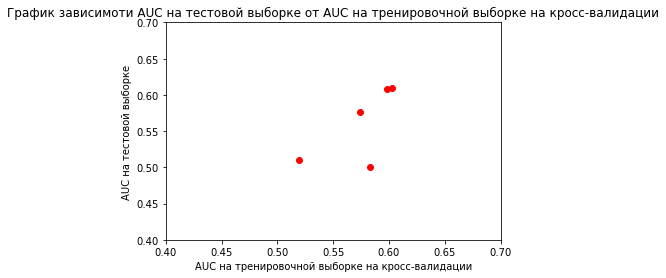

In [32]:
#График зависимоти AUC на тестовой выборке от AUC на тренировочной выборке на кросс-валидации
plt.plot([0.574, 0.519, 0.583, 0.598, 0.603], [0.577, 0.510, 0.500, 0.608, 0.609], 'ro')
plt.axis([0.4, 0.7, 0.4, 0.7])
plt.xlabel('AUC на тренировочной выборке на кросс-валидации')
plt.ylabel('AUC на тестовой выборке')
plt.title('График зависимоти AUC на тестовой выборке от AUC на тренировочной выборке на кросс-валидации')
plt.show()

In [ ]:
'''
Отчёт:

Модель 1) Логистическая модель с категорийными фичами ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
AUC на тренировочной выборке на кросс-валидации: 0.574
AUC на тестовой выборке: 0.577

Модель 2) Добавлю числовые фичи ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
AUC на тренировочной выборке на кросс-валидации: 0.519
AUC на тестовой выборке: 0.510
Результаты и на кросс-валидации, и на тестовой выборке ухудшились

Модель 3) Нормирую числовые фичи из модели 2
AUC на тренировочной выборке на кросс-валидации: 0.583
AUC на тестовой выборке: 0.500
Нормирование числовых фичей улучшило результат на кросс-валидации, однако ухудшило его на тестовой выборке.

Модель 4) Убираю числовые фичи, добавленные в модели 2 и добавляю фичи ['NAME_TYPE_SUITE','NAME_INCOME_TYPE']
AUC на тренировочной выборке на кросс-валидации: 0.598
AUC на тестовой выборке: 0.608
Результаты и на кросс-валидации, и на тестовой выборке немного улудшились по сравнению с моделью 1

Модель 5) Добавлю категорийные фичи ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
AUC на тренировочной выборке на кросс-валидации: 0.603
AUC на тестовой выборке: 0.609
Результаты и на кросс-валидации, и на тестовой выборке немного улудшились по сравнению с моделью 1


Выводы:
- Не всегда улучшение результата на кросс-валидации на тренировочной выборке равно улчшению результата на тестовой
(например модель 3)

'''